# IRIS - Connection II

![Add layer](https://github.com/DrKAI/image/blob/main/Add%20Layer.png?raw=true)

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기
* iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [2]:
iris = load_iris()

x = iris.data
y = iris.target

In [3]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=0.1, random_state=2022)

## **sepal끼리, petal끼리**

In [7]:
x_train.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [8]:
x_train_sepal = x_train.loc[:, ['sepal length (cm)', 'sepal width (cm)']]
x_train_petal = x_train.loc[:, ['petal length (cm)', 'petal width (cm)']]

In [9]:
x_test_sepal = x_test.loc[:, ['sepal length (cm)', 'sepal width (cm)']]
x_test_petal = x_test.loc[:, ['petal length (cm)', 'petal width (cm)']]

## One-hot Encoding

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
n = len(np.unique(y_train))
n

3

In [15]:
y_train = to_categorical(y_train, n)
y_test = to_categorical(y_test, n)

## Modeling : multi-input & Add layer

In [16]:
from tensorflow. keras.backend import clear_session
from tensorflow. keras.layers import Input, Dense, Add
from tensorflow. keras.models import Model

In [17]:
from tensorflow.python import metrics
clear_session()

il_sepal = Input(shape=(2,))
hl_sepal = Dense(4, activation='relu')(il_sepal)

il_petal = Input(shape=(2,))
hl_petal = Dense(4, activation='relu')(il_petal)

al = Add()([hl_sepal, hl_petal])
ol = Dense(3, activation='softmax')(al)

model = Model([il_sepal, il_petal], ol)

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 4)            12          ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 4)            12          ['input_2[0][0]']                
                                                                                              

## 모델 시각화

In [18]:
from tensorflow.keras.utils import plot_model

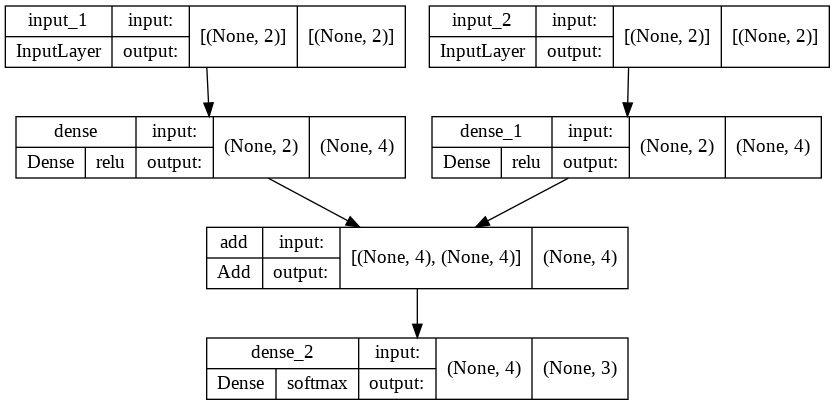

In [19]:
plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

## 학습 시켜보기!

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=1,
                   verbose=1,
                   restore_best_weights=True)

In [22]:
model.fit([x_train_sepal, x_train_petal],
          y_train,
          epochs=1000,
          verbose=1,
          callbacks=[es],
          validation_split=0.1)

Epoch 1/1000
4/4 [==============================] - 1s 67ms/step - loss: 3.2179 - accuracy: 0.3223 - val_loss: 2.7613 - val_accuracy: 0.5000
Epoch 2/1000
4/4 [==============================] - 0s 9ms/step - loss: 3.1692 - accuracy: 0.3223 - val_loss: 2.7232 - val_accuracy: 0.5000
Epoch 3/1000
4/4 [==============================] - 0s 10ms/step - loss: 3.1180 - accuracy: 0.3223 - val_loss: 2.6866 - val_accuracy: 0.5000
Epoch 4/1000
4/4 [==============================] - 0s 9ms/step - loss: 3.0672 - accuracy: 0.3223 - val_loss: 2.6508 - val_accuracy: 0.5000
Epoch 5/1000
4/4 [==============================] - 0s 9ms/step - loss: 3.0199 - accuracy: 0.3223 - val_loss: 2.6153 - val_accuracy: 0.5000
Epoch 6/1000
4/4 [==============================] - 0s 10ms/step - loss: 2.9718 - accuracy: 0.3223 - val_loss: 2.5808 - val_accuracy: 0.5000
Epoch 7/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.9270 - accuracy: 0.3223 - val_loss: 2.5472 - val_accuracy: 0.5000
Epoch 8/1000
4/4 